In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import datetime as dt
import calendar
import cartopy.feature as cfeature

In [3]:
dpm = {'noleap': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '365_day': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'standard': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'proleptic_gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'all_leap': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '366_day': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '360_day': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}

In [4]:

def leap_year(year, calendar='standard'):
    """Determine if year is a leap year"""
    leap = False
    if ((calendar in ['standard', 'gregorian',
        'proleptic_gregorian', 'julian']) and
        (year % 4 == 0)):
        leap = True
        if ((calendar == 'proleptic_gregorian') and
            (year % 100 == 0) and
            (year % 400 != 0)):
            leap = False
        elif ((calendar in ['standard', 'gregorian']) and
                 (year % 100 == 0) and (year % 400 != 0) and
                 (year < 1583)):
            leap = False
    return leap

def get_dpm(time, calendar='standard'):
    """
    return a array of days per month corresponding to the months provided in `months`
    """
    month_length = np.zeros(len(time), dtype=np.int)

    cal_days = dpm[calendar]

    for i, (month, year) in enumerate(zip(time.month, time.year)):
        month_length[i] = cal_days[month]
        if leap_year(year, calendar=calendar) and month == 2:
            month_length[i] += 1
    return month_length


In [3]:
# Open files
pr_c5_r1_hist = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_historical_r1i1p1_197601-200512_2.5_mes.nc')
pr_c5_r2_hist = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_historical_r2i1p1_197601-200512_2.5_mes.nc')
pr_c5_r3_hist = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_historical_r3i1p1_197601-200512_2.5_mes.nc')
pr_c5_ens_hist = (pr_c5_r1_hist.pr + pr_c5_r2_hist.pr + pr_c5_r3_hist.pr) /3
pr_c5_26_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_mes.nc')
pr_c5_85_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_mes.nc')
pr_c5_26_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_mes.nc')
pr_c5_85_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_mes.nc')

pr_c6_r1_hist = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r1_2.5_mes.nc')
pr_c6_r2_hist = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r2_2.5_mes.nc')
pr_c6_r3_hist = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r3_2.5_mes.nc')
pr_c6_ens_hist = (pr_c6_r1_hist.pr + pr_c6_r2_hist.pr + pr_c6_r3_hist.pr) /3
pr_c6_126_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc')
pr_c6_126_far = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc')

pr_obs = xr.open_dataset('observacionales/precip.mon.total.v7_197601-200512_2.5_anu.nc')

ua_c6_r1_hist = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_historical_r1_2.5.nc')
ua_c6_r2_hist = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_historical_r2_2.5.nc')
ua_c6_r3_hist = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_historical_r3_2.5.nc')
ua_c6_ens_hist = (ua_c6_r1_hist.ua + ua_c6_r2_hist.ua + ua_c6_r3_hist.ua) / 3
ua_c6_126_close = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
ua_c6_126_far = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
ua_c6_585_close = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
ua_c6_585_far = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')

va_c6_r1_hist = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_historical_r1_2.5.nc')
va_c6_r2_hist = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_historical_r2_2.5.nc')
va_c6_r3_hist = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_historical_r3_2.5.nc')
va_c6_ens_hist = (va_c6_r1_hist.va + va_c6_r2_hist.va + va_c6_r3_hist.va) / 3
va_c6_126_close = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
va_c6_126_far = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
va_c6_585_close = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
va_c6_585_far = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')

In [6]:
# Make a DataArray with the number of days in each month, size = len(time)
month_length = xr.DataArray(get_dpm(pr_c5_r1_hist.time.to_index(), calendar='noleap'),
                            coords=[pr_c5_r1_hist.time], name='month_length')

# Calculate the weights by grouping by 'time.season'.
# Conversion to float type ('astype(float)') only necessary for Python 2.x
weights = month_length.groupby('time.season') / month_length.astype(float).groupby('time.season').sum()

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

# Calculate the weighted average
ds_weighted = (pr_c5_r1_hist * weights).groupby('time.season').sum(dim='time')

TypeError: unsupported operand type(s) for *: 'cftime._cftime.DatetimeNoLeap' and 'float'

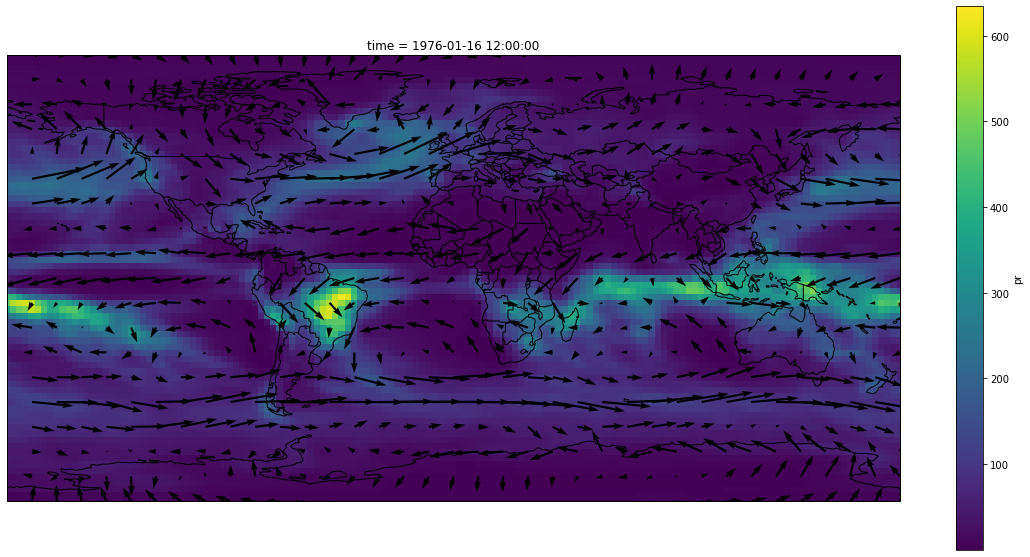

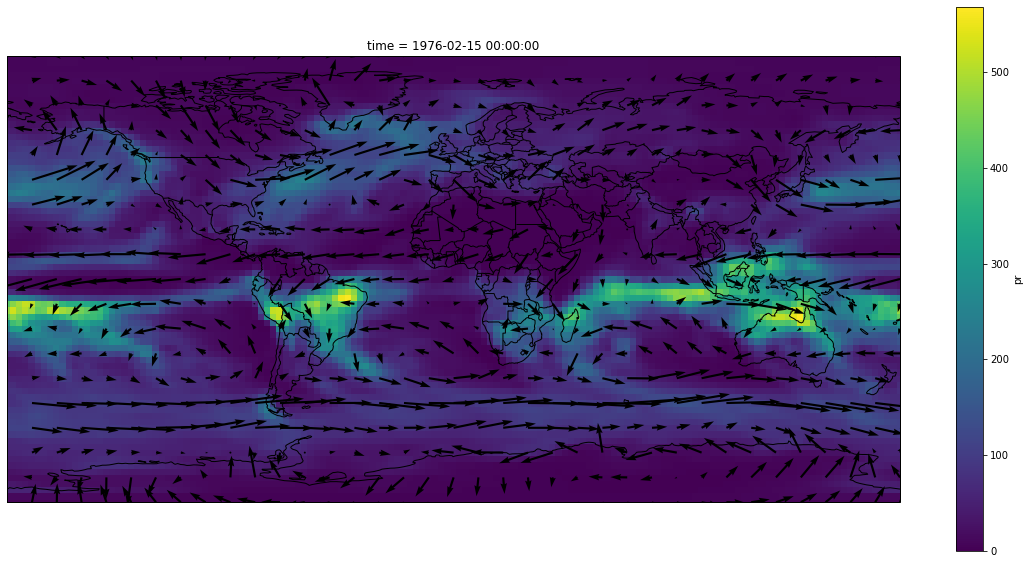

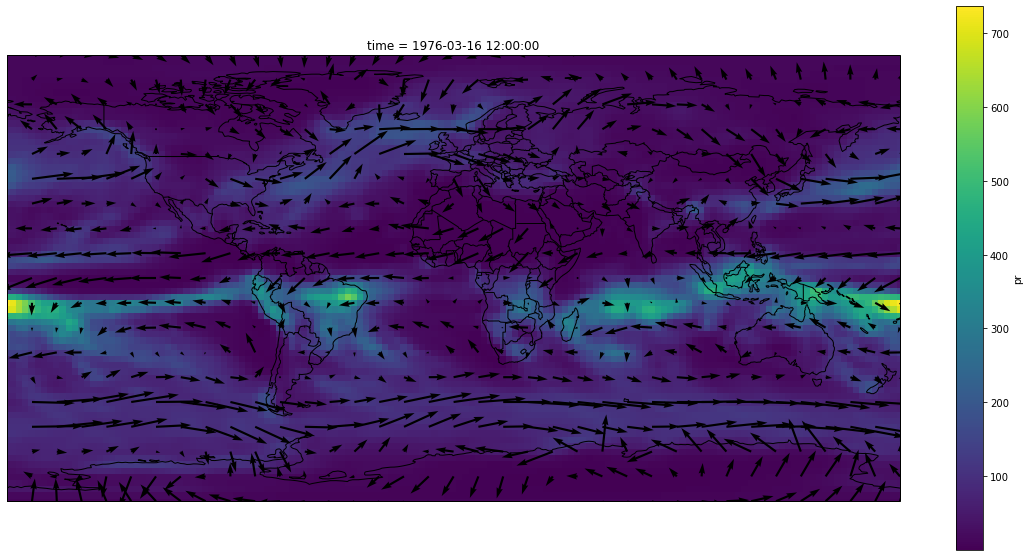

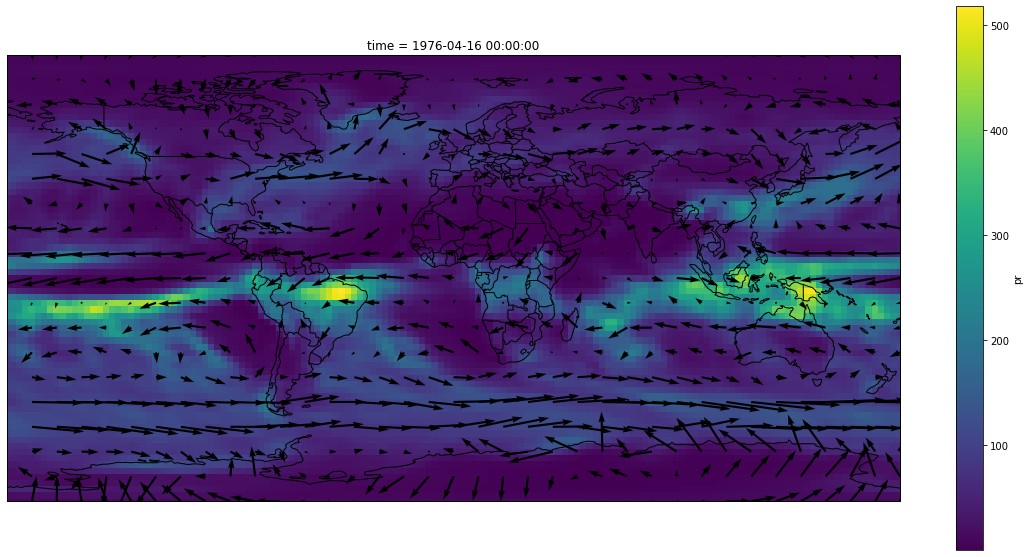

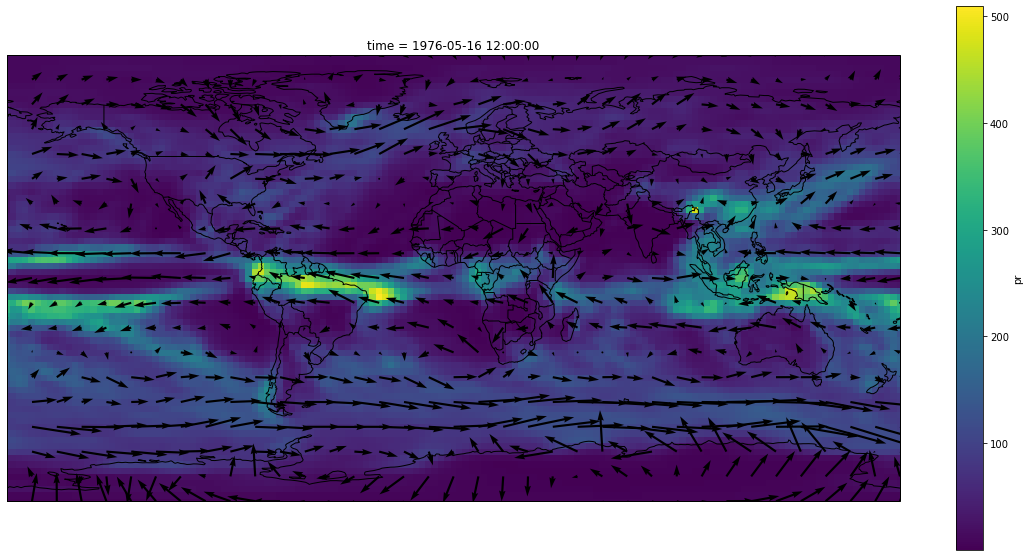

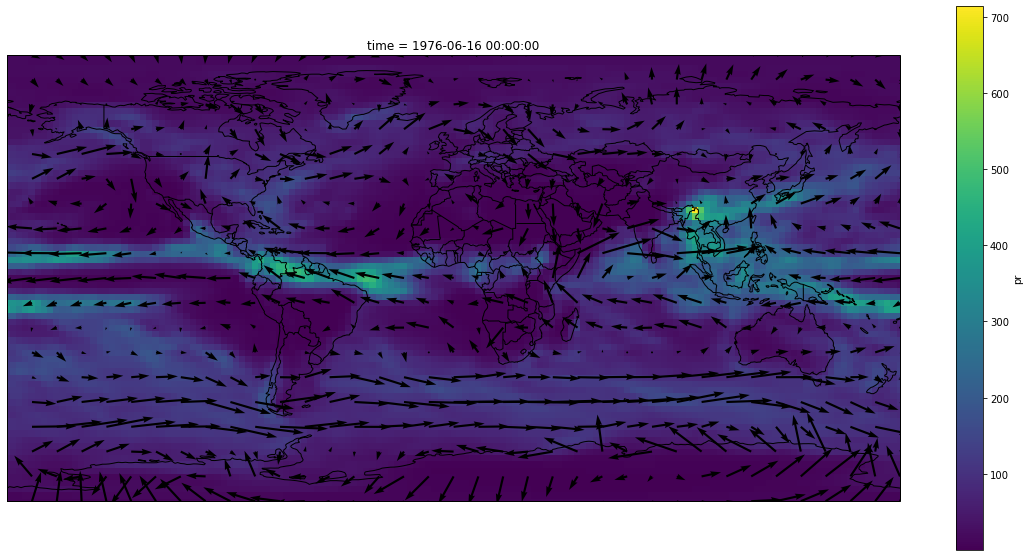

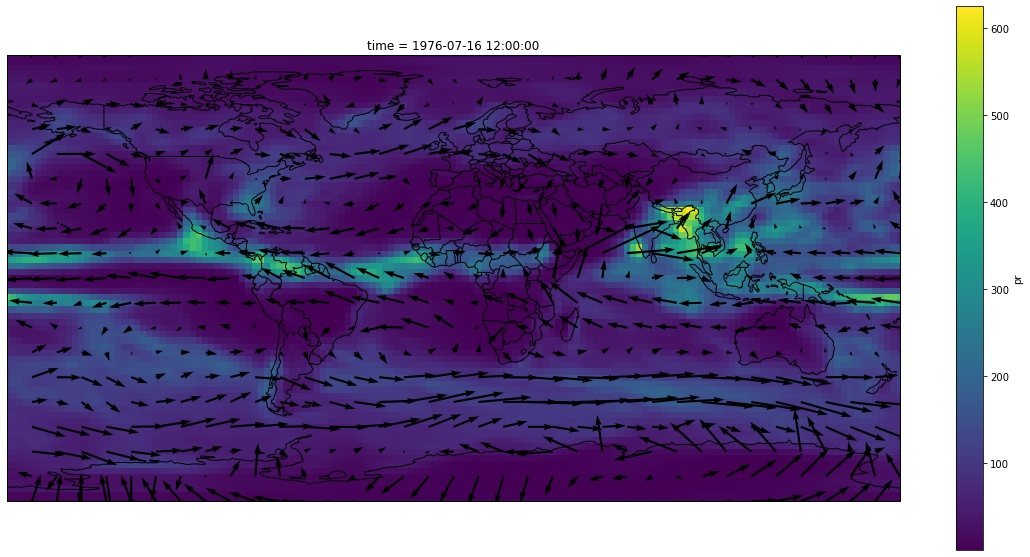

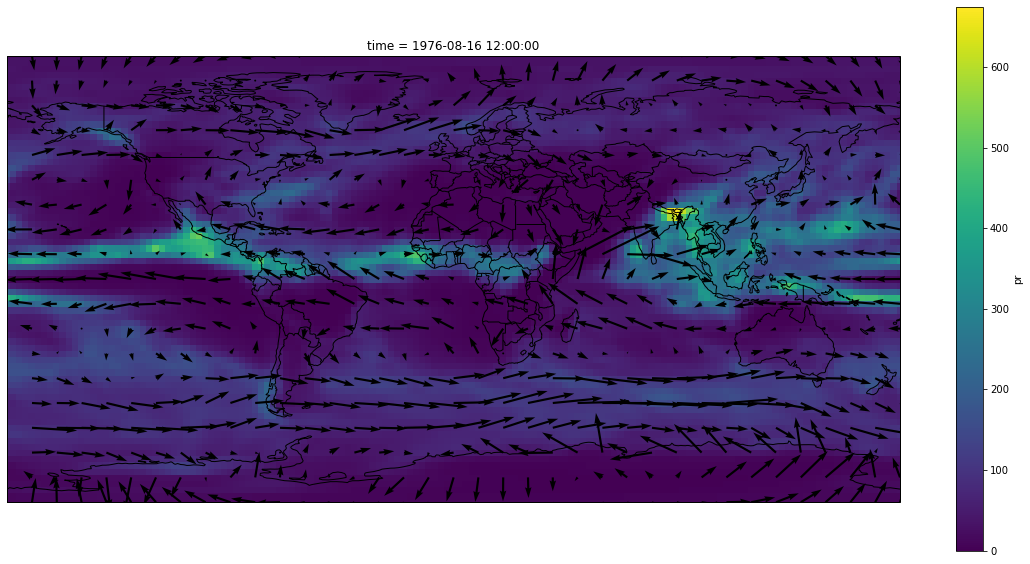

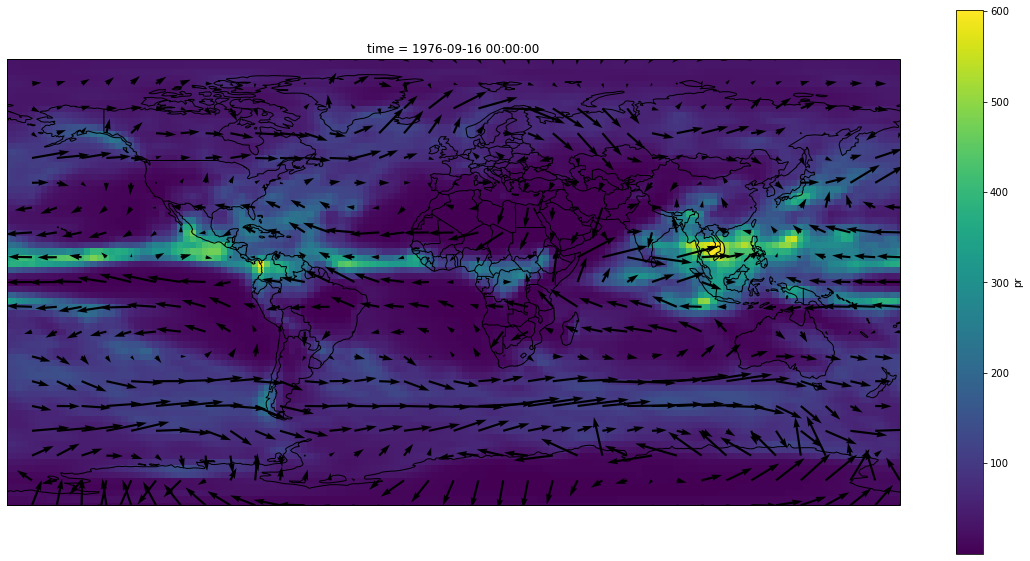

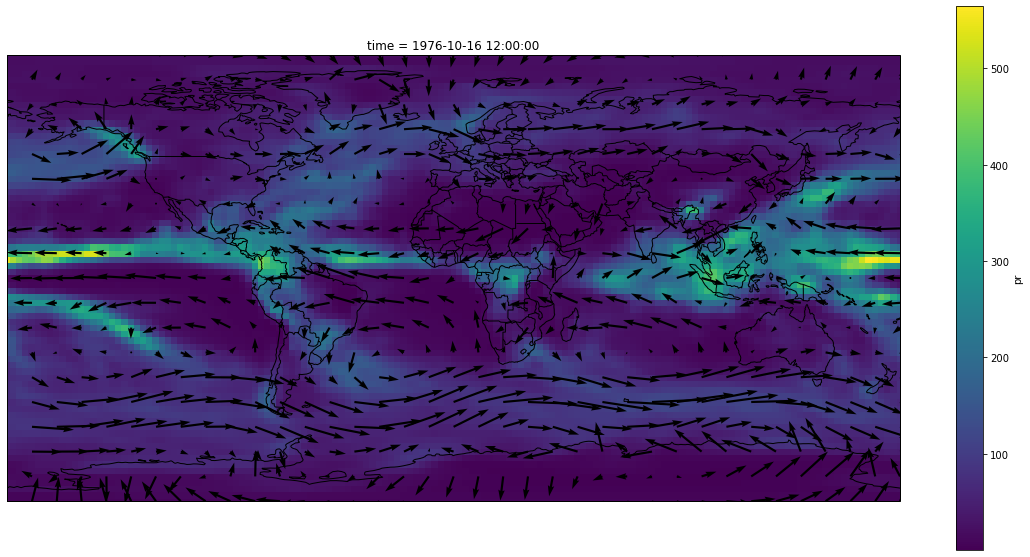

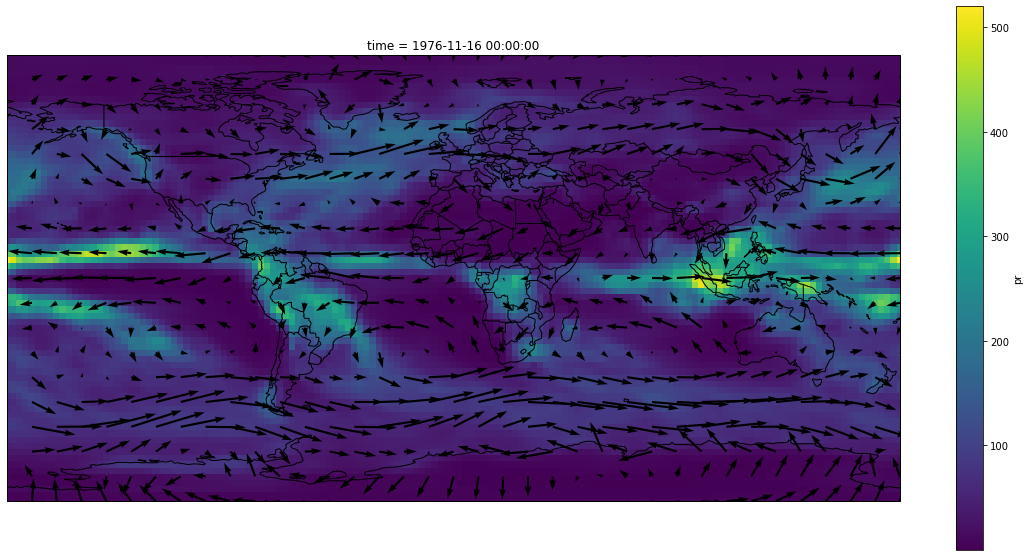

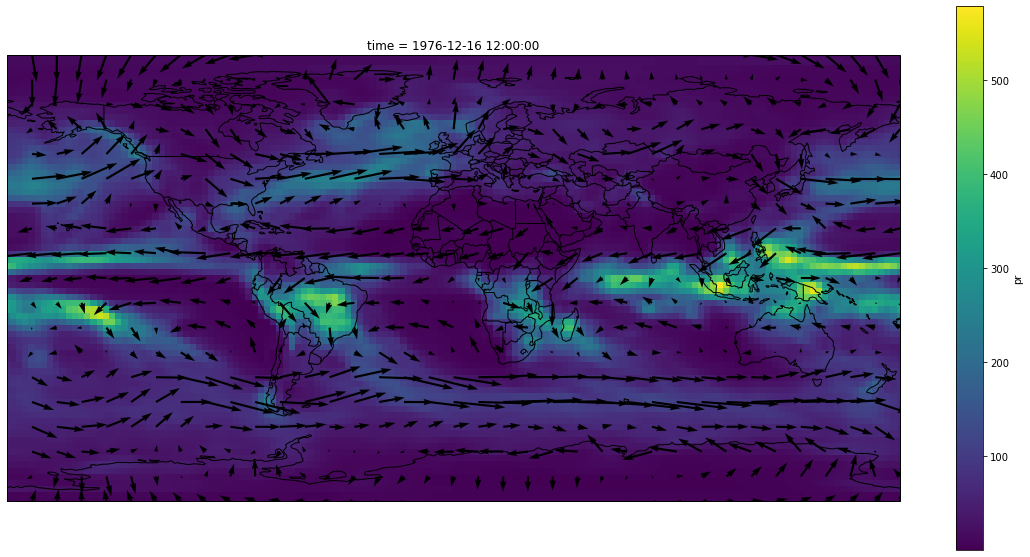

In [152]:
u = ua_c6_r2_hist.ua
v = va_c6_r2_hist.va

#u[0,0][0::2, 0::2].shape
#v[0,0].shape
#u.lat.shape
for i in range(0,12):
    month = i
    plt.figure(figsize=(20,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    pr_c6_ens_hist[month].plot(axes=ax)
    ax.quiver(u.lon[0::4], u.lat[0::4], u[month,0][0::4, 0::4], v[month,0][0::4, 0::4])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    plt.show()

In [108]:
mask_month_ndjfm_hist = ((pr_c5_r1_hist.time.dt.month == 11) + (pr_c5_r1_hist.time.dt.month == 12) +
                    (pr_c5_r1_hist.time.dt.month == 1) + (pr_c5_r1_hist.time.dt.month == 2) +
                    (pr_c5_r1_hist.time.dt.month == 3))
mask_month_mjjas_hist = ((pr_c5_r1_hist.time.dt.month == 5) + (pr_c5_r1_hist.time.dt.month == 6) +
                    (pr_c5_r1_hist.time.dt.month == 7) + (pr_c5_r1_hist.time.dt.month == 8) +
                    (pr_c5_r1_hist.time.dt.month == 9))
mask_month_ndjfm_close = ((pr_c5_26_close.time.dt.month == 11) + (pr_c5_26_close.time.dt.month == 12) +
                    (pr_c5_26_close.time.dt.month == 1) + (pr_c5_26_close.time.dt.month == 2) +
                    (pr_c5_26_close.time.dt.month == 3))
mask_month_mjjas_close = ((pr_c5_26_close.time.dt.month == 5) + (pr_c5_26_close.time.dt.month == 6) +
                    (pr_c5_26_close.time.dt.month == 7) + (pr_c5_26_close.time.dt.month == 8) +
                    (pr_c5_26_close.time.dt.month == 9))
#print(mask_month_ndjfm)


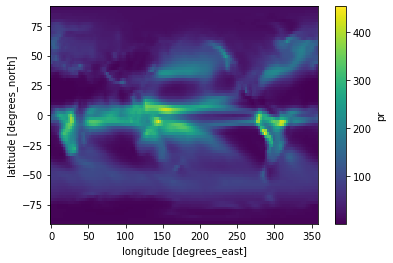

In [109]:
mask_month_ndjfm = ((pr_c5_26_close.time.dt.month == 11) + (pr_c5_26_close.time.dt.month == 12) +
                    (pr_c5_26_close.time.dt.month == 1) + (pr_c5_26_close.time.dt.month == 2) +
                    (pr_c5_26_close.time.dt.month == 3))
mask_month_mjjas = ((pr_c5_26_close.time.dt.month == 5) + (pr_c5_26_close.time.dt.month == 6) +
                    (pr_c5_26_close.time.dt.month == 7) + (pr_c5_26_close.time.dt.month == 8) +
                    (pr_c5_26_close.time.dt.month == 9))
(pr_c5_26_close.pr).where(mask_month_ndjfm).mean(dim='time').plot()

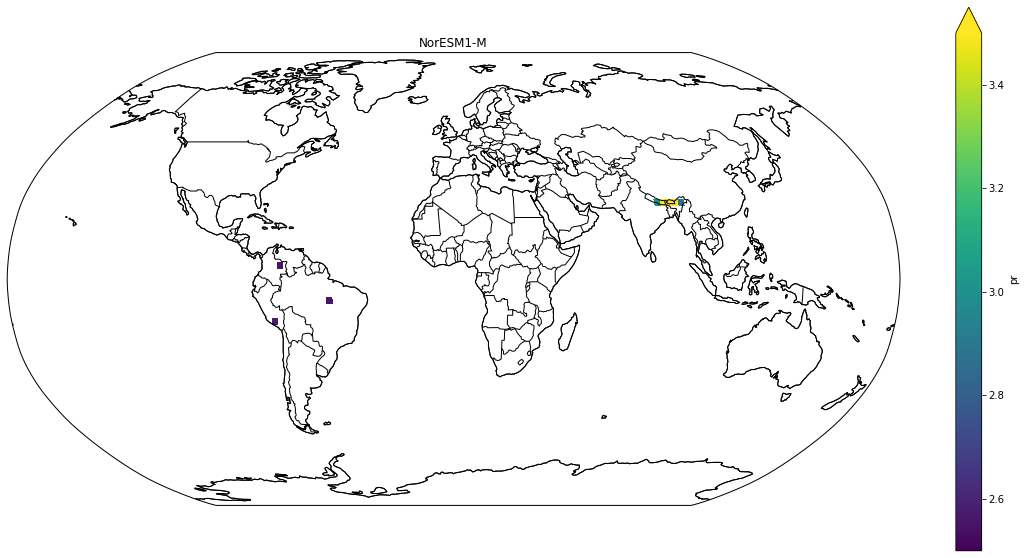

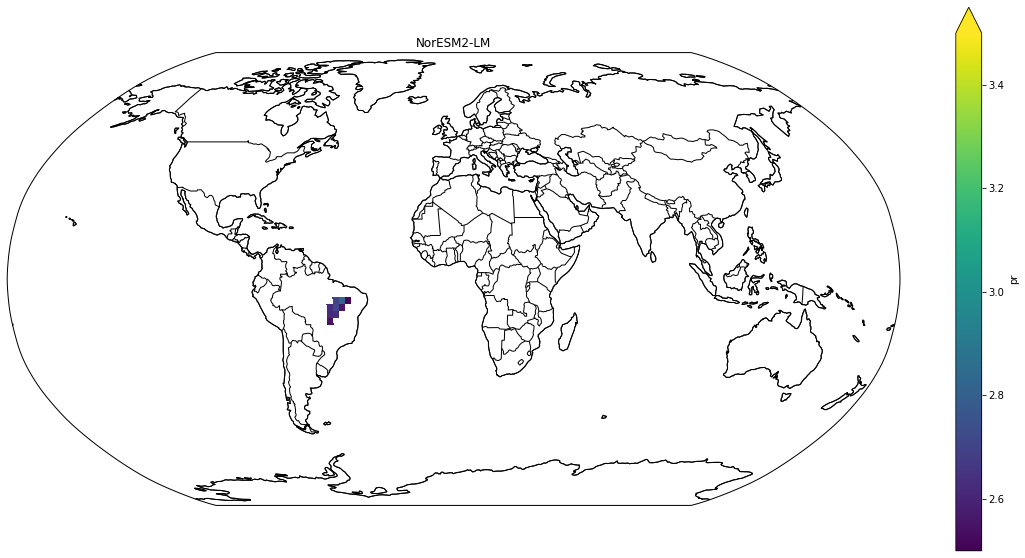

In [143]:
season = pr_c5_r1_hist.time.dt.season

mean_ndjfm = pr_c5_ens_hist.where(mask_month_ndjfm_hist).mean(dim='time')
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

mean_mjjas = pr_c5_ens_hist.where(mask_month_mjjas_hist).mean(dim='time')
ploteo = xr.ufuncs.fabs(((mean_ndjfm / 151)- (mean_mjjas / 153))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=2.5, vmax=3.5,
                                                                       extend='max')
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM1-M');
plt.show();

mean_ndjfm = pr_c6_ens_hist.where(mask_month_ndjfm_hist).mean(dim='time')
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

mean_mjjas = pr_c6_ens_hist.where(mask_month_mjjas_hist).mean(dim='time')
ploteo = xr.ufuncs.fabs(((mean_ndjfm / 151)- (mean_mjjas / 153))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=2.5, vmax = 3.5,
                                                                       extend='max')
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM2-LM');
plt.show();

############################### Futuro cercano, rcp 26 ###############################
#season = pr_c5_r1_hist.time.dt.season
#
#mean_ndjfm = pr_c5_26_close.pr.where(mask_month_ndjfm_close).mean(dim='time')
#plt.figure(figsize=(20,10))
#ax = plt.axes(projection=ccrs.Robinson())
#ax.coastlines()
#ax.add_feature(cfeature.BORDERS)
#
#mean_mjjas = pr_c5_26_close.pr.where(mask_month_mjjas_close).mean(dim='time')
#ploteo = xr.ufuncs.fabs(((mean_ndjfm / 151)- (mean_mjjas / 153))).plot(ax=ax, transform=ccrs.PlateCarree(),
#                                                                       vmin=2.5,
#                                                              extend='neither')
#cmap = ploteo.get_cmap()
#cmap.set_under('w')
#ax.set_global(); ax.coastlines();
#plt.title('NorESM1-M Cercano RCP 26');
#plt.show();
#
#mean_ndjfm = pr_c6_126_close.pr.where(mask_month_ndjfm_close).mean(dim='time')
#plt.figure(figsize=(20,10))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()
#ax.add_feature(cfeature.BORDERS)
#
#mean_mjjas = pr_c6_126_close.pr.where(mask_month_mjjas_close).mean(dim='time')
#ploteo = xr.ufuncs.fabs(((mean_ndjfm / 151)- (mean_mjjas / 153))).plot(ax=ax, transform=ccrs.PlateCarree(),
#                                                                       vmin=2.5,
#                                                              extend='neither')
#cmap = ploteo.get_cmap()
#cmap.set_under('w')
#ax.set_global(); ax.coastlines();
#ax.quiver(u.lon[0::4], u.lat[0::4], u[month,0][0::4, 0::4], v[month,0][0::4, 0::4]);
#plt.title('NorESM2-LM Cercano 126');
#plt.show();
#
#mean_ndjfm = pr_c6_126_close.pr.where(mask_month_ndjfm_close).mean(dim='time')
#plt.figure(figsize=(20,10))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()
#ax.add_feature(cfeature.BORDERS)
#
#mean_mjjas = pr_c6_126_close.pr.where(mask_month_mjjas_close).mean(dim='time')
#ploteo = xr.ufuncs.fabs(((mean_ndjfm / 151)- (mean_mjjas / 153))).plot(ax=ax, transform=ccrs.PlateCarree(),
#                                                                       vmin=2.5,
#                                                              extend='neither')
#cmap = ploteo.get_cmap()
#cmap.set_under('w')
#ax.set_global(); ax.coastlines();
##ax.quiver(u.lon[0::4], u.lat[0::4], u[month,0][0::4, 0::4], v[month,0][0::4, 0::4]);
#plt.title('NorESM2-LM Cercano 126');
#plt.show();
#
#
#mean_ndjfm = pr_c6_126_close.pr.where(mask_month_ndjfm_close).mean(dim='time')
#plt.figure(figsize=(20,10))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()
#ax.add_feature(cfeature.BORDERS)
#
#mean_mjjas = pr_c6_126_close.pr.where(mask_month_mjjas_close).mean(dim='time')
#ploteo = xr.ufuncs.fabs(((mean_ndjfm / 151)- (mean_mjjas / 153))).plot(ax=ax, transform=ccrs.PlateCarree(),
#                                                                       vmin=2.5,
#                                                              extend='neither')
#cmap = ploteo.get_cmap()
#cmap.set_under('w')
#ax.set_global(); ax.coastlines();
#ax.quiver(u.lon[0::4], u.lat[0::4], u[month,0][0::4, 0::4], v[month,0][0::4, 0::4]);
#plt.title('NorESM2-LM Cercano 126');
#plt.show();
#
#mean_ndjfm = pr_c6_126_close.pr.where(mask_month_ndjfm_close).mean(dim='time')
#plt.figure(figsize=(20,10))
#ax = plt.axes(projection=ccrs.Robinson())
#ax.coastlines()
#ax.add_feature(cfeature.BORDERS)
#
#mean_mjjas = pr_c6_126_close.pr.where(mask_month_mjjas_close).mean(dim='time')
#ploteo = xr.ufuncs.fabs(((mean_ndjfm / 151)- (mean_mjjas / 153))).plot(ax=ax, #transform=ccrs.PlateCarree(),
#                                                                       vmin=2.5,
#                                                              extend='neither')
#ax.quiver(u.lon, u.lat, u[month,0], v[month,0])#, transform=ccrs.PlateCarree());
#cmap = ploteo.get_cmap()
#cmap.set_under('w')
#ax.set_global(); ax.coastlines();
#plt.title('NorESM2-LM Cercano 126');
#plt.show();


################################################################################################
#season = pr_c5_r1_hist.time.dt.season
#
#mean_ndjfm = pr_c5_85_close.pr.where(mask_month_ndjfm_close).mean(dim='time')
#plt.figure(figsize=(20,10))
#ax = plt.axes(projection=ccrs.Robinson())
#ax.coastlines()
#ax.add_feature(cfeature.BORDERS)
#
#mean_mjjas = pr_c5_85_close.pr.where(mask_month_mjjas_close).mean(dim='time')
#ploteo = xr.ufuncs.fabs(((mean_ndjfm / 151)- (mean_mjjas / 153))).plot(ax=ax, transform=ccrs.PlateCarree(),
#                                                                       vmin=2.5,
#                                                              extend='neither')
#cmap = ploteo.get_cmap()
#cmap.set_under('w')
#ax.set_global(); ax.coastlines();
#plt.title('NorESM1-M Cercano RCP 85');
#plt.show();


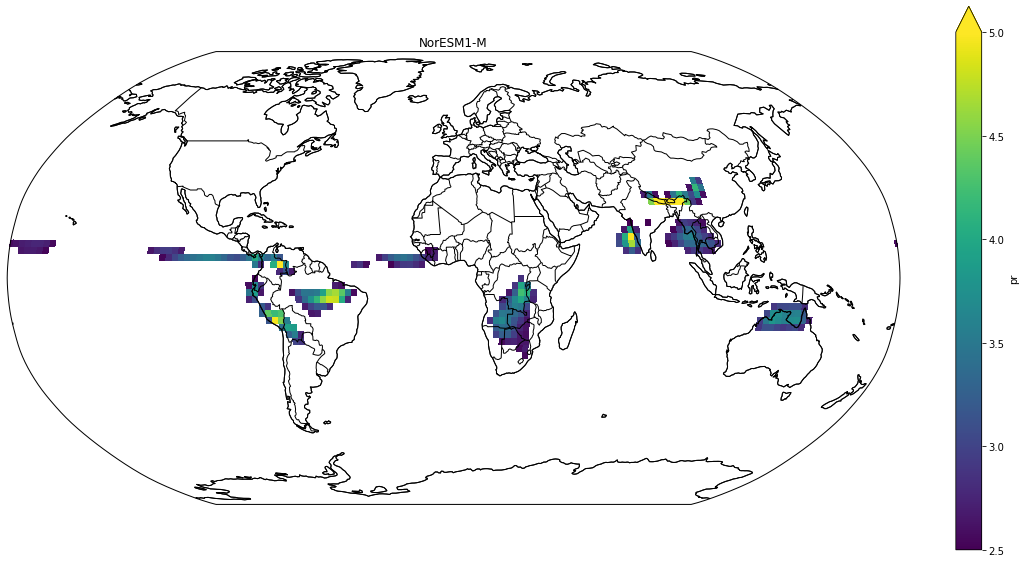

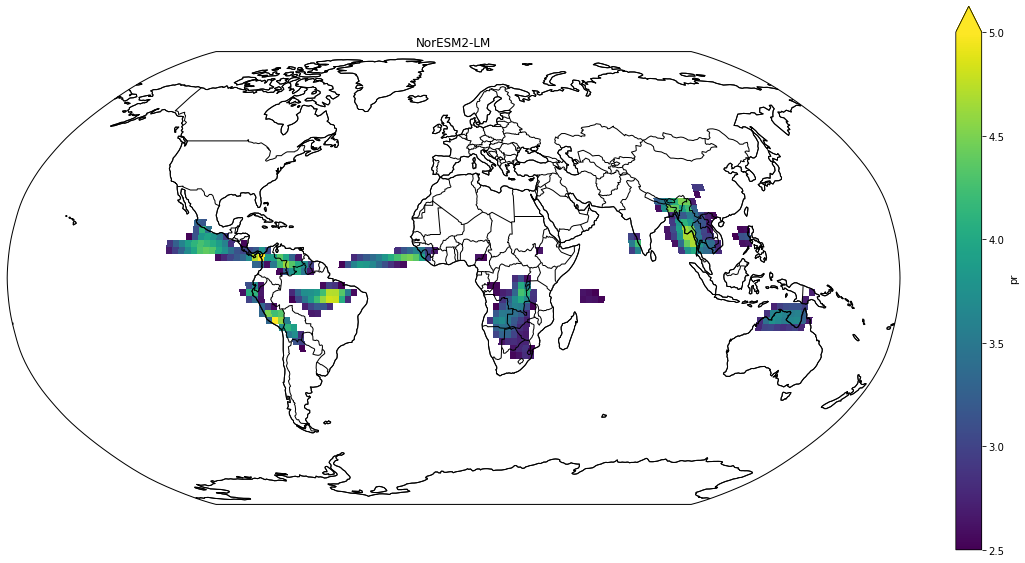

In [144]:
mask_month_djf = ((pr_c5_r1_hist.time.dt.month == 12) +
                    (pr_c5_r1_hist.time.dt.month == 1) + (pr_c5_r1_hist.time.dt.month == 2))
mask_month_jja = ((pr_c5_r1_hist.time.dt.month == 6) +
                    (pr_c5_r1_hist.time.dt.month == 7) + (pr_c5_r1_hist.time.dt.month == 8))

mean_djf = pr_c5_ens_hist.where(mask_month_djf).mean(dim='time')
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

mean_jja = pr_c5_ens_hist.where(mask_month_jja).mean(dim='time')
ploteo = xr.ufuncs.fabs(((mean_djf / 90)- (mean_jja / 92))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=2.5, vmax=5,
                                                              extend='max')
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM1-M');
plt.show();

mean_djm = pr_c6_ens_hist.where(mask_month_djf).mean(dim='time')
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

mean_jja = pr_c6_ens_hist.where(mask_month_jja).mean(dim='time')
ploteo = xr.ufuncs.fabs(((mean_djf / 90)- (mean_jja / 92))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=2.5, vmax=5,
                                                              extend='max')
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM2-LM');
plt.show();

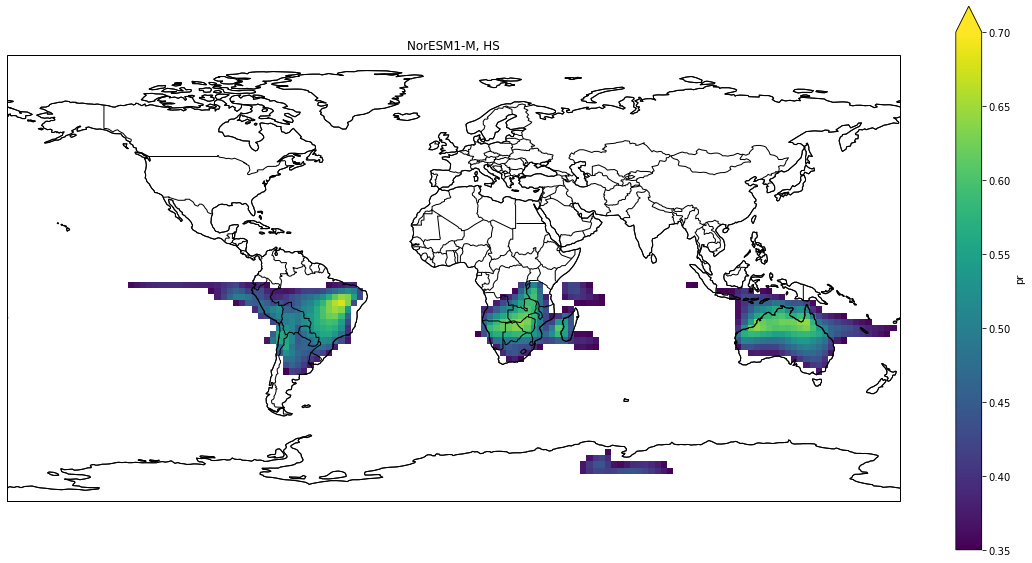

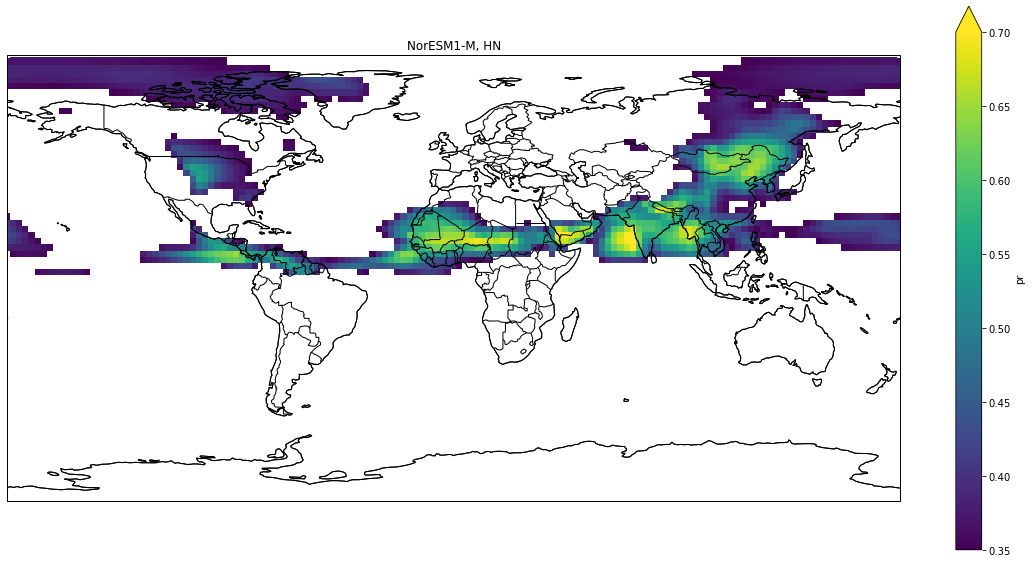

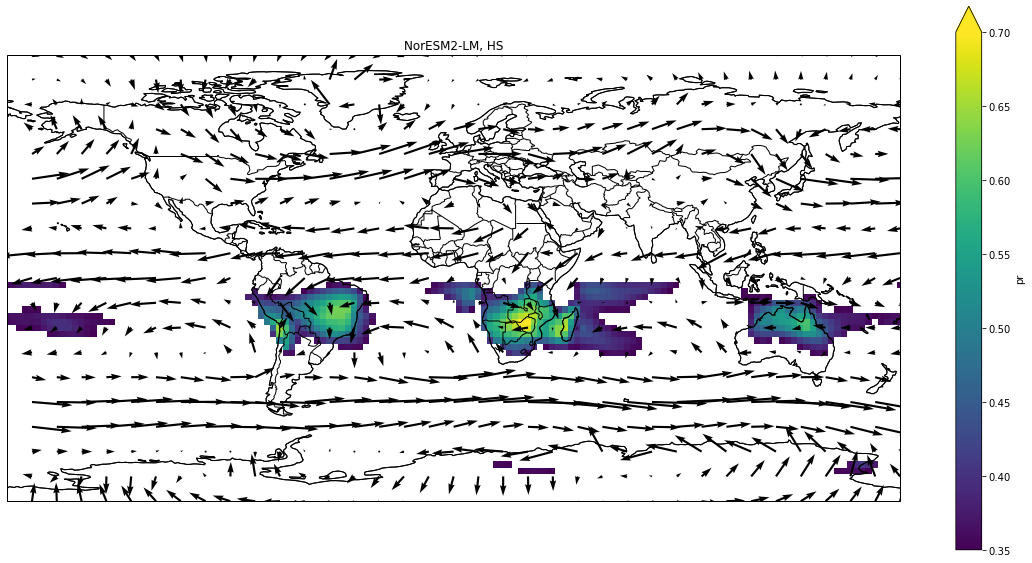

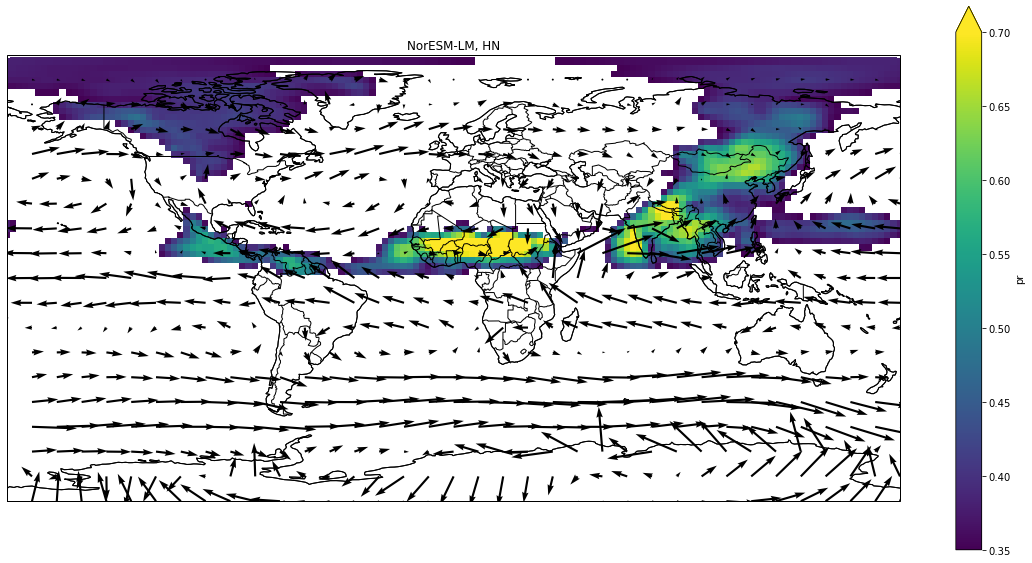

In [156]:
mean_djf = pr_c5_ens_hist.where(mask_month_djf).mean(dim='time')
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

ploteo = (pr_c5_ens_hist.where(mask_month_djf).where(pr_c5_r1_hist.lat < 0).sum(dim='time') / (pr_c5_ens_hist.sum(dim='time'))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=0.35, vmax=0.7,
                                                              extend='max')
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM1-M, HS');
plt.show();

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ploteo = (pr_c5_ens_hist.where(mask_month_jja).where(pr_c5_r1_hist.lat > 0).sum(dim='time') / (pr_c5_ens_hist.sum(dim='time'))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=0.35, vmax=0.7,
                                                              extend='max')
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM1-M, HN');
plt.show();

mean_djm = pr_c6_ens_hist.where(mask_month_djf).mean(dim='time')
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

ploteo = (pr_c6_ens_hist.where(mask_month_djf).where(pr_c5_r1_hist.lat < 0).sum(dim='time') / (pr_c6_ens_hist.sum(dim='time'))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=0.35, vmax=0.7,
                                                              extend='max')
ax.quiver(u.lon[0::4], u.lat[0::4], 
          u.isel(plev=0).where(mask_month_djf).mean(dim='time')[0::4, 0::4],
          v.isel(plev=0).where(mask_month_djf).mean(dim='time')[0::4, 0::4])

cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM2-LM, HS');
plt.show();

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ploteo = (pr_c6_ens_hist.where(mask_month_jja).where(pr_c5_r1_hist.lat > 0).sum(dim='time') / (pr_c6_ens_hist.sum(dim='time'))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=0.35, vmax=0.7,
                                                              extend='max')
ax.quiver(u.lon[0::4], u.lat[0::4], 
          u.isel(plev=0).where(mask_month_jja).mean(dim='time')[0::4, 0::4],
          v.isel(plev=0).where(mask_month_jja).mean(dim='time')[0::4, 0::4])
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM-LM, HN');
plt.show();

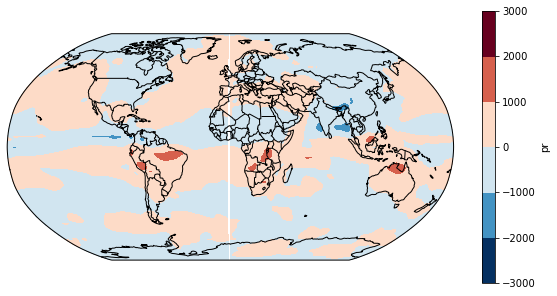

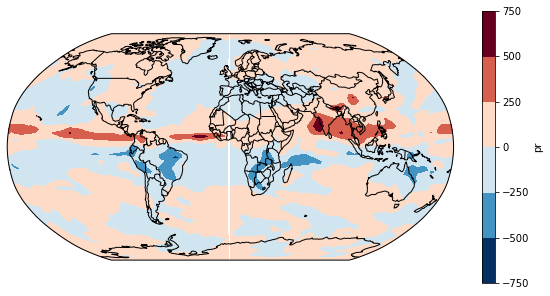

In [102]:
average = (pr_c5_r1_hist.pr[11] + pr_c5_r1_hist.pr[12] + pr_c5_r1_hist.pr[13] 
           - pr_c5_r1_hist.pr[5] - pr_c5_r1_hist.pr[6] - pr_c5_r1_hist.pr[7])
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
average.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_global()
plt.show()
average = -(pr_c5_r1_hist.pr[1] 
           - pr_c5_r1_hist.pr[7] )
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
average.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_global()
plt.show()